### ☯ **EDA - Seasonal pattern**  

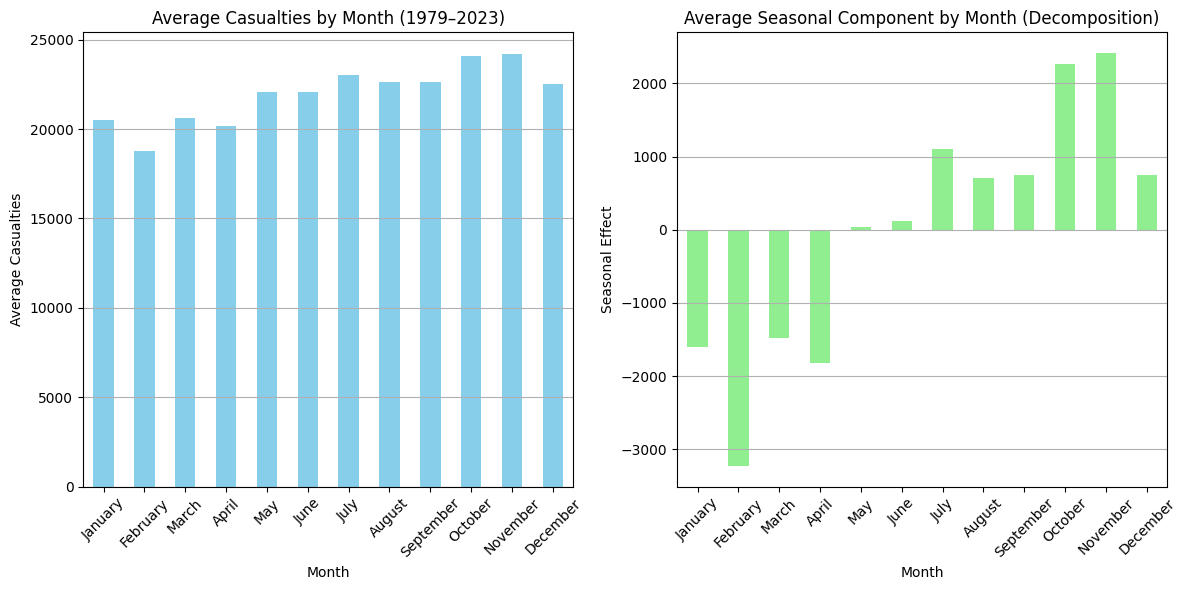


Average Casualties by Month (1979–2023):
Month
January      20486.49
February     18791.02
March        20593.56
April        20189.78
May          22057.24
June         22059.24
July         23032.13
August       22605.69
September    22625.09
October      24084.80
November     24201.80
December     22516.89
Name: Total Casualties, dtype: float64

Average Seasonal Component by Month (Decomposition):
Month
January     -1601.15
February    -3229.01
March       -1478.33
April       -1828.06
May            35.26
June          115.05
July         1103.56
August        711.10
September     746.45
October      2266.64
November     2416.80
December      741.71
Name: Seasonal, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Load the dataset
file_path = 'https://raw.githubusercontent.com/ThammakornS/DataForFun/refs/heads/main/casualties_per_month_long.csv'  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Ensure Month-Year is in datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%Y-%m')
df['Month'] = df['Month-Year'].dt.month_name()

# Method 1: Average casualties by month across all years
monthly_avg = df.groupby('Month')['Total Casualties'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Method 2: Time series decomposition
# Perform decomposition with a period of 12 (annual seasonality)
decomposition = seasonal_decompose(df['Total Casualties'], model='additive', period=12)

# Extract the seasonal component
seasonal = decomposition.seasonal
# Average the seasonal component by month
seasonal_df = pd.DataFrame({
    'Month-Year': df['Month-Year'],
    'Seasonal': seasonal,
    'Month': df['Month']
})
seasonal_monthly_avg = seasonal_df.groupby('Month')['Seasonal'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot average casualties by month
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Casualties by Month (1979–2023)')
plt.xlabel('Month')
plt.ylabel('Average Casualties')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Plot seasonal component by month
plt.subplot(1, 2, 2)
seasonal_monthly_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Seasonal Component by Month (Decomposition)')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Print the average casualties by month
print("\nAverage Casualties by Month (1979–2023):")
print(monthly_avg.round(2))

# Print the average seasonal component by month
print("\nAverage Seasonal Component by Month (Decomposition):")
print(seasonal_monthly_avg.round(2))

See specific year

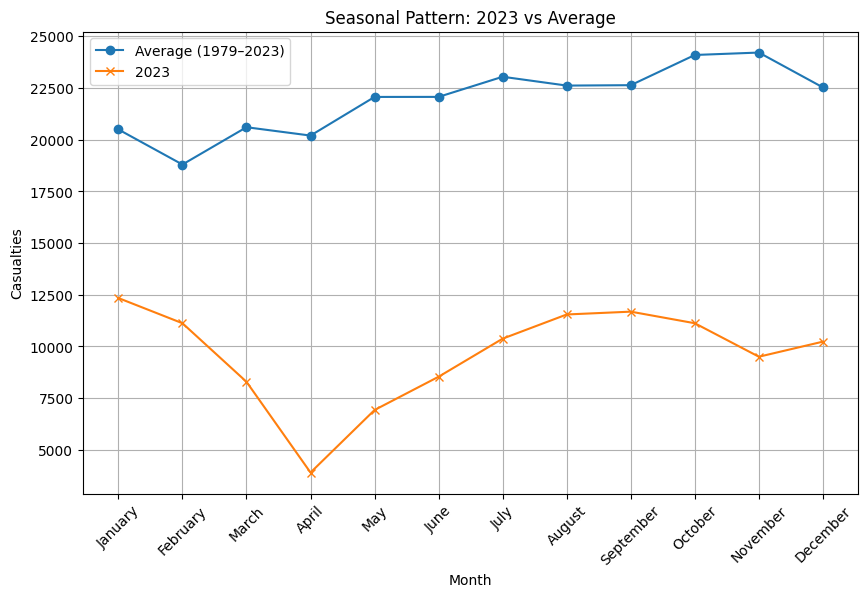

In [ ]:
df_2023 = df[df['Month-Year'].dt.year == 2020]
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg, label='Average (1979–2023)', marker='o')
plt.plot(df_2023['Month'], df_2023['Total Casualties'], label='2023', marker='x')
plt.title('Seasonal Pattern: 2023 vs Average')
plt.xlabel('Month')
plt.ylabel('Casualties')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import f_oneway
monthly_groups = [df[df['Month'] == month]['Total Casualties'] for month in monthly_avg.index]
f_stat, p_value = f_oneway(*monthly_groups)
print(f"ANOVA p-value: {p_value:.5f}")

ANOVA p-value: 0.00029


\
### ☯ **Test with Transformer (Tf Basic, minimal built):**

\
⚡**MultiHeadAttention:**  
  
self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)  
  
| Parameter                                | Description                                                                           |
| ---------------------------------------- | ------------------------------------------------------------------------------------- |
| `num_heads`                              | (Set) Number of attention heads.                                                      |
| `key_dim`                                | (Set as `embed_dim`) Size of each attention head for query and key.                   |
| `value_dim`                              | Size of value vectors for each attention head. Defaults to `key_dim`.                 |
| `dropout`                                | Dropout probability for attention scores. Default is `0.0`.                           |
| `use_bias`                               | Whether to use bias in linear projections. Default is `True`.                         |
| `output_shape`                           | The expected shape of the output tensor. Default is `None`, i.e., same as input.      |
| `attention_axes`                         | Axes over which attention is applied. Default is `None` (all except batch and heads). |
| `kernel_initializer`, `bias_initializer` | Initializers for weights and biases.                                                  |
| `kernel_regularizer`, `bias_regularizer` | Regularizers for weights and biases.                                                  |
| `activity_regularizer`                   | Regularizer for output.                                                               |
| `kernel_constraint`, `bias_constraint`   | Constraints for weights and biases.                                                   |


\
⚡**Dense layers in FFN:**   
  
self.ffn = tf.keras.Sequential([  
    layers.Dense(ff_dim, activation='relu'),  
    layers.Dense(embed_dim),  
])  
  
| Parameter                                                        | Description                                                    |
| ---------------------------------------------------------------- | -------------------------------------------------------------- |
| `units`                                                          | (Set) Number of neurons in the layer.                          |
| `activation`                                                     | (Set for first layer, default for second) Activation function. |
| `use_bias`                                                       | Whether to include a bias term. Default is `True`.             |
| `kernel_initializer`, `bias_initializer`                         | Initializers for weights and biases.                           |
| `kernel_regularizer`, `bias_regularizer`, `activity_regularizer` | Regularization options.                                        |
| `kernel_constraint`, `bias_constraint`                           | Constraints for weights and biases.                            |


\
⚡**LayerNormalization:**  
  
self.layernorm1 = layers.LayerNormalization()  
self.layernorm2 = layers.LayerNormalization()  
  
| Parameter                               | Description                                                               |
| --------------------------------------- | ------------------------------------------------------------------------- |
| `axis`                                  | Axis or axes to normalize. Default is `-1`.                               |
| `epsilon`                               | Small float added to variance to avoid divide by zero. Default is `1e-3`. |
| `center`                                | Whether to include a trainable center parameter (β). Default is `True`.   |
| `scale`                                 | Whether to include a trainable scale parameter (γ). Default is `True`.    |
| `beta_initializer`, `gamma_initializer` | Initializers for β and γ.                                                 |
| `beta_regularizer`, `gamma_regularizer` | Regularizers for β and γ.                                                 |
| `beta_constraint`, `gamma_constraint`   | Constraints for β and γ.                                                  |


\
⚡ **Dropout:**  
  
self.dropout1 = layers.Dropout(rate)  
self.dropout2 = layers.Dropout(rate)   
  
| Parameter     | Description                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| `rate`        | (Set) Dropout rate (fraction of inputs to drop).                              |
| `noise_shape` | Shape for randomly dropped elements. Default is `None` (same shape as input). |
| `seed`        | Random seed for reproducibility.                                              |



🔍 Testing: WS=4, Blocks=1, Embed=16, Heads=1, LR=0.001, Dropout=0.05, ValueDim=None, AttnDropout=0.0, Bias=True, Eps=0.001, Center=True, Scale=True
Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0286 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - val_loss: 4.0885e-04 - learning_rate: 0.0010
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.5201e-04 - val_loss: 2.1082e-04 - learning_rate: 0.0010
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.7348e-04 - val_loss: 1.7219e-04 - learning_rate: 0.0010
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3161e-04 - val_loss: 1.7450e-04 - learning_rate: 0.0010
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.9917e-04 - val_loss: 1.8938e-04 - learning_rate: 0.0010
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3467e-04 - val_loss: 2.3148e-04 - learning_rate: 0.0010
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1

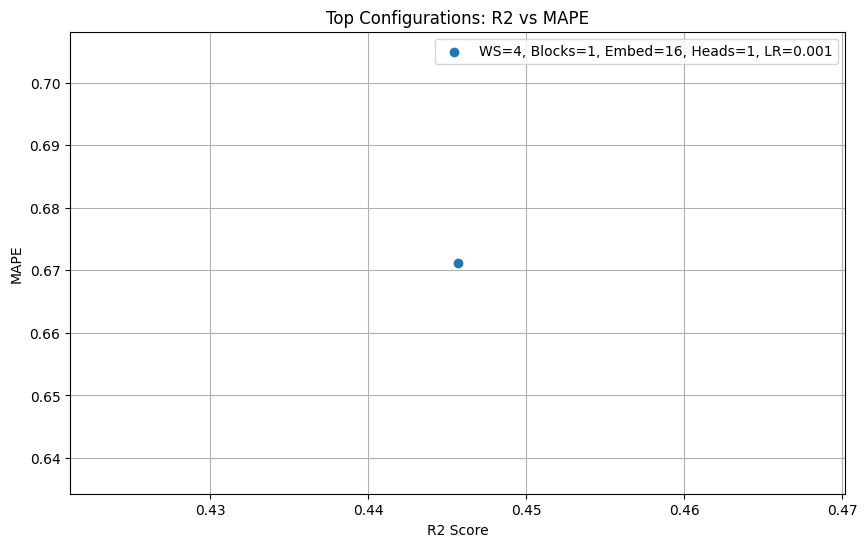

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import warnings
import random
import os

# Set reproducible seed 👈
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
# Optional: deterministic ops (if your TF version supports it)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()
warnings.filterwarnings("ignore")

# Define MAPE metric
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Load and preprocess the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    # Apply log transformation to Total Casualties
    # data = np.log1p(df['Total Casualties'].values.astype(float))
    data = df['Total Casualties'].values.astype(float)/100
    # Normalize the log-transformed data
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data.reshape(-1, 1)).flatten()
    # Extract month as a feature (1-12)
    df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%Y-%m')
    months = df['Month-Year'].dt.month.values
    # Normalize months to [0, 1]
    month_scaler = MinMaxScaler()
    months_normalized = month_scaler.fit_transform(months.reshape(-1, 1)).flatten()
    return data_normalized, months_normalized, scaler, month_scaler, data

# Prepare sequences for a given window size
def create_dataset(series, months, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        # Combine series and month features
        X.append(np.stack([series[i:i+window_size], months[i:i+window_size]], axis=-1))
        y.append(series[i+window_size])
    X = np.array(X)  # Shape: [samples, window_size, features]
    y = np.array(y)
    return X, y

# Transformer Block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,
                 value_dim=None, attn_dropout=0.0, use_bias=True,
                 norm_epsilon=1e-3, norm_center=True, norm_scale=True):
        super().__init__()
        self.att = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim,
            value_dim=value_dim,
            dropout=attn_dropout,
            use_bias=use_bias
        )
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation='relu', use_bias=use_bias),
            layers.Dense(embed_dim, use_bias=use_bias),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=norm_epsilon, center=norm_center, scale=norm_scale)
        self.layernorm2 = layers.LayerNormalization(epsilon=norm_epsilon, center=norm_center, scale=norm_scale)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False, **kwargs):
        attn_output = self.att(inputs, inputs, training=training)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1, training=training)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

# Build Transformer model with LSTM
def build_model(input_shape, num_blocks, embed_dim, num_heads, ff_dim, dropout_rate,
                value_dim, attn_dropout, use_bias, norm_epsilon, norm_center, norm_scale):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(32, return_sequences=True)(inputs)
    x = layers.Dense(embed_dim)(x)
    for _ in range(num_blocks):
        x = TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=dropout_rate,
                             value_dim=value_dim, attn_dropout=attn_dropout, use_bias=use_bias,
                             norm_epsilon=norm_epsilon, norm_center=norm_center, norm_scale=norm_scale)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(1)(x)
    return models.Model(inputs, x)

# Load the dataset
file_path = 'https://raw.githubusercontent.com/ThammakornS/DataForFun/refs/heads/main/casualties_per_month_long_year_norm.csv'  # Update with the correct path if needed
data_normalized, months_normalized, scaler, month_scaler, raw_data = load_data(file_path)

# Hyperparameter grid
# param_grid = {
#     'window_size': [2, 3, 4, 6],
#     'num_blocks': [1, 2],
#     'embed_dim': [8, 16, 32],
#     'num_heads': [1, 2],
#     'learning_rate': [0.001],
#     'dropout_rate': [0.1, 0.2]
# }

# param_grid = {
#     'window_size': [4, 6],
#     'num_blocks': [1, 4],
#     'embed_dim': [8, 16],
#     'num_heads': [1],
#     'learning_rate': [0.001],
#     'dropout_rate': [0.05, 0.1]
# }
# Best R2 at:
# Window Size  Num Blocks  Embed Dim  Num Heads  Learning Rate  Dropout Rate
#       4           1         16          1          0.001         0.05

# ⚡⚡⚡⚡
param_grid = {
    'window_size': [4],
    'num_blocks': [1],
    'embed_dim': [16],
    'num_heads': [1],
    'learning_rate': [0.001],
    'dropout_rate': [0.05],
    'value_dim': [None],  # Could try [None, 8]
    'attn_dropout': [0.0],  # Add 0.1 to test effect
    'use_bias': [True],
    'norm_epsilon': [1e-3],  # Try also 1e-5
    'norm_center': [True],
    'norm_scale': [True],
    'epochs': [200]  # 👈 Not too much
}

results = []

# Grid search
for window_size, num_blocks, embed_dim, num_heads, lr, dropout_rate, \
    value_dim, attn_dropout, use_bias, norm_epsilon, norm_center, norm_scale, epochs in product(
    param_grid['window_size'], param_grid['num_blocks'], param_grid['embed_dim'],
    param_grid['num_heads'], param_grid['learning_rate'], param_grid['dropout_rate'],
    param_grid['value_dim'], param_grid['attn_dropout'], param_grid['use_bias'],
    param_grid['norm_epsilon'], param_grid['norm_center'], param_grid['norm_scale'],
    param_grid['epochs']
):
    if embed_dim % num_heads != 0:
        continue

    print(f"\n🔍 Testing: WS={window_size}, Blocks={num_blocks}, Embed={embed_dim}, Heads={num_heads}, "
          f"LR={lr}, Dropout={dropout_rate}, ValueDim={value_dim}, AttnDropout={attn_dropout}, "
          f"Bias={use_bias}, Eps={norm_epsilon}, Center={norm_center}, Scale={norm_scale}")

    X, y = create_dataset(raw_data, months_normalized, window_size)
    total_samples = len(X)
    total_months = len(data_normalized)
    test_start_idx = total_months - 12
    test_indices = [i for i in range(total_samples) if i + window_size >= test_start_idx]
    train_val_indices = [i for i in range(total_samples) if i + window_size < test_start_idx]
    train_split = int(0.85 * len(train_val_indices))
    train_indices = train_val_indices[:train_split]
    val_indices = train_val_indices[train_split:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    model = build_model((window_size, 2), num_blocks, embed_dim, num_heads, 64, dropout_rate,
                        value_dim, attn_dropout, use_bias, norm_epsilon, norm_center, norm_scale)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    model.fit(X_train, y_train, epochs=epochs, batch_size=12, verbose=1,
          validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler])

    test_preds = model.predict(X_test, verbose=0).flatten()
    test_preds_rescaled = np.expm1(scaler.inverse_transform(test_preds.reshape(-1, 1)).flatten())
    y_test_rescaled = np.expm1(scaler.inverse_transform(y_test.reshape(-1, 1)).flatten())

    mse = mean_squared_error(y_test_rescaled, test_preds_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, test_preds_rescaled)
    r2 = r2_score(y_test_rescaled, test_preds_rescaled)

    results.append((window_size, num_blocks, embed_dim, num_heads, lr, dropout_rate,
                value_dim, attn_dropout, use_bias, norm_epsilon, norm_center, norm_scale,
                epochs, mse, mape, r2))
    print(f"✅ MAPE: {mape:.5f}, R2: {r2:.5f}")


# Results DataFrame
results_df = pd.DataFrame(results, columns=[
    'Window Size', 'Num Blocks', 'Embed Dim', 'Num Heads', 'Learning Rate', 'Dropout Rate',
    'Value Dim', 'Attn Dropout', 'Use Bias', 'Norm Epsilon', 'Norm Center', 'Norm Scale',
    'Epochs', 'MSE', 'MAPE', 'R2'
]).sort_values(by='R2', ascending=False)
print("\nResults DataFrame (sorted by R2):")
print(results_df)

# Plot R2 for top configurations
top_configs = results_df.head(5)
plt.figure(figsize=(10, 6))
for idx, row in top_configs.iterrows():
    label = f"WS={row['Window Size']}, Blocks={row['Num Blocks']}, Embed={row['Embed Dim']}, Heads={row['Num Heads']}, LR={row['Learning Rate']}"
    plt.scatter(row['R2'], row['MAPE'], label=label)
plt.title("Top Configurations: R2 vs MAPE")
plt.xlabel("R2 Score")
plt.ylabel("MAPE")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# get result dataframe
results_df

,Window Size,Num Blocks,Embed Dim,Num Heads,Learning Rate,Dropout Rate,Value Dim,Attn Dropout,Use Bias,Norm Epsilon,Norm Center,Norm Scale,Epochs,MSE,MAPE,R2
0,4,1,16,1,0.001,0.05,None,0.0,True,0.001,True,True,200,1.178571e-07,0.671214,0.445667


seed 42, epoch 30:  R2 = 0.445667

In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
# results_df.to_csv('/content/drive/MyDrive/Monetize_Project/AdapT-Transformer/results_2.csv', index=False)


\
### ☯ **Using Autoformer:**

**Note:**  
Autoformer fix seed number = 2021 🥶  
if you want to change, you need to **edit run.py after install**!!!

#### **basic config**
    parser.add_argument('--is_training', type=int, required=True, default=1, help='status')
    parser.add_argument('--model_id', type=str, required=True, default='test', help='model id')
    parser.add_argument('--model', type=str, required=True, default='Autoformer',
                        help='model name, options: [Autoformer, Informer, Transformer]')

    # data loader
    parser.add_argument('--data', type=str, required=True, default='ETTm1', help='dataset type')
    parser.add_argument('--root_path', type=str, default='./data/ETT/', help='root path of the data file')
    parser.add_argument('--data_path', type=str, default='ETTh1.csv', help='data file')
    parser.add_argument('--features', type=str, default='M',
                        help='forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate')
    parser.add_argument('--target', type=str, default='OT', help='target feature in S or MS task')
    parser.add_argument('--freq', type=str, default='h',
                        help='freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h')
    parser.add_argument('--checkpoints', type=str, default='./checkpoints/', help='location of model checkpoints')

    # forecasting task
    parser.add_argument('--seq_len', type=int, default=96, help='input sequence length')
    parser.add_argument('--label_len', type=int, default=48, help='start token length')
    parser.add_argument('--pred_len', type=int, default=96, help='prediction sequence length')

    # model define
    parser.add_argument('--bucket_size', type=int, default=4, help='for Reformer')
    parser.add_argument('--n_hashes', type=int, default=4, help='for Reformer')
    parser.add_argument('--enc_in', type=int, default=7, help='encoder input size')
    parser.add_argument('--dec_in', type=int, default=7, help='decoder input size')
    parser.add_argument('--c_out', type=int, default=7, help='output size')
    parser.add_argument('--d_model', type=int, default=512, help='dimension of model')
    parser.add_argument('--n_heads', type=int, default=8, help='num of heads')
    parser.add_argument('--e_layers', type=int, default=2, help='num of encoder layers')
    parser.add_argument('--d_layers', type=int, default=1, help='num of decoder layers')
    parser.add_argument('--d_ff', type=int, default=2048, help='dimension of fcn')
    parser.add_argument('--moving_avg', type=int, default=25, help='window size of moving average')
    parser.add_argument('--factor', type=int, default=1, help='attn factor')
    parser.add_argument('--distil', action='store_false',
                        help='whether to use distilling in encoder, using this argument means not using distilling',
                        default=True)
    parser.add_argument('--dropout', type=float, default=0.05, help='dropout')
    parser.add_argument('--embed', type=str, default='timeF',
                        help='time features encoding, options:[timeF, fixed, learned]')
    parser.add_argument('--activation', type=str, default='gelu', help='activation')
    parser.add_argument('--output_attention', action='store_true', help='whether to output attention in encoder')
    parser.add_argument('--do_predict', action='store_true', help='whether to predict unseen future data')

    # optimization
    parser.add_argument('--num_workers', type=int, default=10, help='data loader num workers')
    parser.add_argument('--itr', type=int, default=2, help='experiments times')
    parser.add_argument('--train_epochs', type=int, default=10, help='train epochs')
    parser.add_argument('--batch_size', type=int, default=32, help='batch size of train input data')
    parser.add_argument('--patience', type=int, default=3, help='early stopping patience')
    parser.add_argument('--learning_rate', type=float, default=0.0001, help='optimizer learning rate')
    parser.add_argument('--des', type=str, default='test', help='exp description')
    parser.add_argument('--loss', type=str, default='mse', help='loss function')
    parser.add_argument('--lradj', type=str, default='type1', help='adjust learning rate')
    parser.add_argument('--use_amp', action='store_true', help='use automatic mixed precision training', default=False)

    # GPU
    parser.add_argument('--use_gpu', type=bool, default=True, help='use gpu')
    parser.add_argument('--gpu', type=int, default=0, help='gpu')
    parser.add_argument('--use_multi_gpu', action='store_true', help='use multiple gpus', default=False)
    parser.add_argument('--devices', type=str, default='0,1,2,3', help='device ids of multile gpus')

#### ***no year normalize (not good as normalized)***  

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!git clone https://github.com/thuml/Autoformer.git
%cd Autoformer

!pip install -r requirements.txt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/DataForFun/refs/heads/main/casualties.csv")  # adjust path if needed
df.columns = ['date', 'value']
df.to_csv("casualties.csv", index=False)

In [6]:
# ❗❗❗ May change with newer version

file_path = "/content/Autoformer/utils/tools.py"

with open(file_path, "r") as file:
    content = file.read()

# Replace deprecated np.Inf with float('inf')
content = content.replace("np.Inf", "float('inf')")

with open(file_path, "w") as file:
    file.write(content)

print("✅ Fixed np.Inf issue in tools.py")


✅ Fixed np.Inf issue in tools.py


In [12]:
# ⚡⚡⚡
!python -u run.py \
  --is_training 1 \
  --root_path /content/Autoformer \
  --data_path casualties.csv \
  --model_id casualties_96_24 \
  --model Autoformer \
  --data custom \
  --features S \
  --target value \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --n_heads 1\
  --e_layers 4 \
  --d_layers 4 \
  --factor 1 \
  --enc_in 1 \
  --dec_in 1 \
  --c_out 1 \
  --des 'Exp' \
  --itr 1

# !python -u run.py \
#   --is_training 1 \
#   --root_path /content/Autoformer \
#   --data_path casualties.csv \
#   --model_id casualties_96_24 \
#   --model Autoformer \
#   --data custom \
#   --features S \
#   --target value \
#   --seq_len 96 \
#   --label_len 48 \
#   --pred_len 24 \
#   --e_layers 2 \
#   --d_layers 1 \
#   --factor 3 \
#   --enc_in 1 \
#   --dec_in 1 \
#   --c_out 1 \
#   --des 'Exp' \
#   --itr 1

python3: can't open file '/content/run.py': [Errno 2] No such file or directory


#### Result is in: Autoformer/results

📊 Metrics:
[0.5775487  0.5444715  0.73788315 0.15087043 0.03226765]

Shape of predictions: (85, 24, 1)
Shape of ground truth: (85, 24, 1)


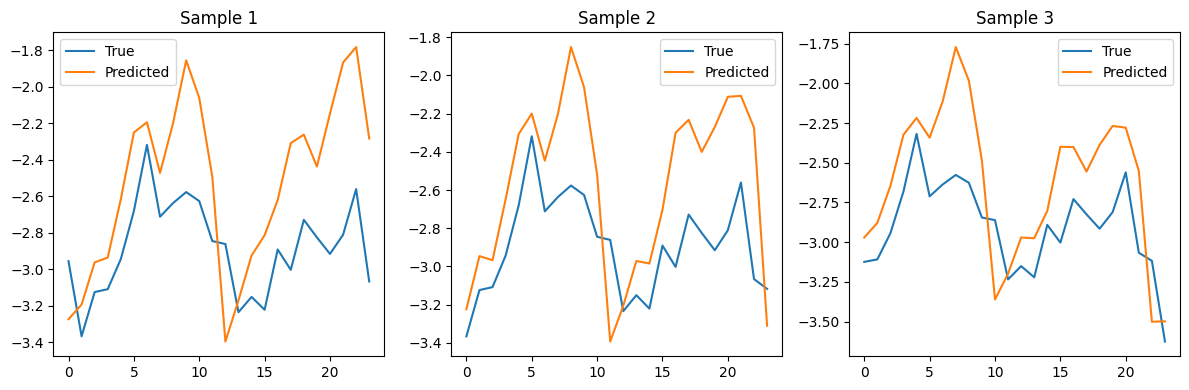

In [13]:
# Load results
metrics = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/metrics.npy')
pred = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy')
true = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/true.npy')

# Show metrics
print("📊 Metrics:")
print(metrics)

# Check shape
print(f"\nShape of predictions: {pred.shape}")
print(f"Shape of ground truth: {true.shape}")

# Plot a few examples
plt.figure(figsize=(12, 4))
for i in range(3):  # show 3 samples
    plt.subplot(1, 3, i + 1)
    plt.plot(true[i], label='True')
    plt.plot(pred[i], label='Predicted')
    plt.title(f'Sample {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
pred = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy')
true = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/true.npy')

# Flatten to evaluate over the whole test set
y_true = true.flatten()
y_pred = pred.flatten()

# Compute metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100  # +epsilon to avoid div by zero
r2 = r2_score(y_true, y_pred)

# Display results
print("📊 Custom Evaluation Metrics")
print(f"🔹 MSE  : {mse:.4f}")
print(f"🔹 MAE  : {mae:.4f}")
print(f"🔹 MAPE : {mape:.2f}%")
print(f"🔹 R²   : {r2:.4f}")

📊 Custom Evaluation Metrics
🔹 MSE  : 0.5445
🔹 MAE  : 0.5775
🔹 MAPE : 15.09%
🔹 R²   : -0.2065


\
#### ***year normalize (better)***  

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!git clone https://github.com/thuml/Autoformer.git
%cd Autoformer

!pip install -r requirements.txt

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/DataForFun/refs/heads/main/casualties_per_month_long_year_norm_add1.csv")  # adjust path if needed
df.columns = ['date', 'value']
df.to_csv("casualties.csv", index=False)

In [17]:
# ❗❗❗ May change with newer version
file_path = "/content/Autoformer/utils/tools.py"

with open(file_path, "r") as file:
    content = file.read()

# Replace deprecated np.Inf with float('inf')
content = content.replace("np.Inf", "float('inf')")

with open(file_path, "w") as file:
    file.write(content)

print("✅ Fixed np.Inf issue in tools.py")


✅ Fixed np.Inf issue in tools.py


In [18]:
# ⚡⚡⚡
!python -u run.py \
  --is_training 1 \
  --root_path /content/Autoformer \
  --data_path casualties.csv \
  --model_id casualties_96_24 \
  --model Autoformer \
  --data custom \
  --features S \
  --target value \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --n_heads 1\
  --e_layers 4 \
  --d_layers 4 \
  --factor 1 \
  --enc_in 1 \
  --dec_in 1 \
  --c_out 1 \
  --des 'Exp' \
  --itr 1


2025-05-12:12:13:47,131 INFO     [utils.py:162] NumExpr defaulting to 2 threads.
Args in experiment:
Namespace(is_training=1, model_id='casualties_96_24', model='Autoformer', data='custom', root_path='/content/Autoformer', data_path='casualties.csv', features='S', target='value', freq='h', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=24, bucket_size=4, n_hashes=4, enc_in=1, dec_in=1, c_out=1, d_model=512, n_heads=1, e_layers=4, d_layers=4, d_ff=2048, moving_avg=25, factor=1, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=10, itr=1, train_epochs=10, batch_size=32, patience=3, learning_rate=0.0001, des='Exp', loss='mse', lradj='type1', use_amp=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3')
Use CPU
>>>>>>>start training : casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh1_el4_dl4_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 259
val 31
test 85
Epoch:

In [ ]:
# Load results
metrics = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/metrics.npy')
pred = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy')
true = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/true.npy')

# Show metrics
print("📊 Metrics:")
print(metrics)

# Check shape
print(f"\nShape of predictions: {pred.shape}")
print(f"Shape of ground truth: {true.shape}")

# Plot a few examples
plt.figure(figsize=(12, 4))
for i in range(3):  # show 3 samples
    plt.subplot(1, 3, i + 1)
    plt.plot(true[i], label='True')
    plt.plot(pred[i], label='Predicted')
    plt.title(f'Sample {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pred = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy')
true = np.load('/content/Autoformer/results/casualties_96_24_Autoformer_custom_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/true.npy')

# Flatten to evaluate over the whole test set
y_true = true.flatten()
y_pred = pred.flatten()

# Compute metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100  # +epsilon to avoid div by zero
r2 = r2_score(y_true, y_pred)

# Display results
print("📊 Custom Evaluation Metrics")
print(f"🔹 MSE  : {mse:.4f}")
print(f"🔹 MAE  : {mae:.4f}")
print(f"🔹 MAPE : {mape:.2f}%")
print(f"🔹 R²   : {r2:.4f}")

\
### ☯ **Using PatchTST:**

| **Parameter**                              | **Description**                                                                                                                                                                              |
| ------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `input_chunk_length=36`                    | Number of past time steps the model will use as input (look-back window).                                                                                                                    |
| `output_chunk_length=12`                   | Number of future time steps the model will forecast (forecast horizon).                                                                                                                      |
| `n_epochs=100`                             | Number of full passes over the training dataset during training.                                                                                                                             |
| `random_state=42`                          | Ensures reproducibility by setting the seed for random number generators.                                                                                                                    |
| `dropout=0.1`                              | Fraction of neurons randomly dropped during training to prevent overfitting. Typical range: 0.0–0.3.                                                                                         |
| `batch_size=32`                            | Number of training sequences processed together in one forward/backward pass. Affects memory usage and training stability.                                                                   |
| `model_name="..."`                         | Name for the model; used for saving/loading checkpoints and logs.                                                                                                                            |
| `save_checkpoints=True`                    | If `True`, the model will save the best-performing weights during training for later reuse or evaluation.                                                                                    |
| `pl_trainer_kwargs={"accelerator": "cpu"}` | Additional configuration passed to the [PyTorch Lightning Trainer](https://lightning.ai/docs/pytorch/stable/common/trainer.html), here specifying to run on CPU. Use `"gpu"` if using a GPU. |


\
\
🧠 Model Architecture Parameters  

| **Parameter**        | **Type**        | **Default** | **Description**                                 |
| -------------------- | --------------- | ----------- | ----------------------------------------------- |
| `d_model`            | `int`           | 64          | Size of embeddings for input/output.            |
| `nhead`              | `int`           | 4           | Number of attention heads.                      |
| `num_encoder_layers` | `int`           | 3           | Number of encoder layers.                       |
| `num_decoder_layers` | `int`           | 3           | Number of decoder layers.                       |
| `dim_feedforward`    | `int`           | 512         | Size of the feedforward network.                |
| `dropout`            | `float`         | 0.1         | Dropout rate (0 = no dropout).                  |
| `activation`         | `str`           | `'relu'`    | Activation function: `'relu'`, `'gelu'`, etc.   |
| `norm_type`          | `str or Module` | `None`      | Normalization layer type (e.g., `'LayerNorm'`). |
| `custom_encoder`     | `Module`        | `None`      | Replace default encoder with custom one.        |
| `custom_decoder`     | `Module`        | `None`      | Replace default decoder with custom one.        |


\
\
🔁 Input/Output Settings  
  

| **Parameter**         | **Type** | **Default** | **Description**                          |
| --------------------- | -------- | ----------- | ---------------------------------------- |
| `input_chunk_length`  | `int`    | —           | Number of past time steps used as input. |
| `output_chunk_length` | `int`    | —           | Number of future time steps predicted.   |


\
\
🏋️ Training Settings  
  
| **Parameter**         | **Type**          | **Default**        | **Description**                                 |
| --------------------- | ----------------- | ------------------ | ----------------------------------------------- |
| `n_epochs`            | `int`             | 100                | Number of training epochs.                      |
| `batch_size`          | `int`             | 32                 | Batch size during training.                     |
| `optimizer_cls`       | `torch.Optimizer` | `torch.optim.Adam` | Optimizer class.                                |
| `optimizer_kwargs`    | `dict`            | `None`             | Parameters for optimizer (e.g., learning rate). |
| `lr_scheduler_cls`    | `torch scheduler` | `None`             | Learning rate scheduler class.                  |
| `lr_scheduler_kwargs` | `dict`            | `None`             | Parameters for LR scheduler.                    |
| `loss_fn`             | `Callable`        | `MSELoss()`        | Loss function used during training.             |
| `torch_metrics`       | `Metric`          | `None`             | TorchMetrics for evaluation.                    |
| `sample_weight`       | `TimeSeries/str`  | `None`             | Optional sample weighting.                      |


\
\
📈 Forecasting Features  
  
| **Parameter**                  | **Type**     | **Default** | **Description**                              |
| ------------------------------ | ------------ | ----------- | -------------------------------------------- |
| `likelihood`                   | `Likelihood` | `None`      | Adds probabilistic forecasting.              |
| `use_reversible_instance_norm` | `bool`       | `False`     | Helps normalize time series during training. |


\
\
🧰 Utility Parameters
  
| **Parameter**       | **Type** | **Default** | **Description**                                |
| ------------------- | -------- | ----------- | ---------------------------------------------- |
| `model_name`        | `str`    | `None`      | Name for saving/loading the model.             |
| `save_checkpoints`  | `bool`   | `False`     | Saves best model checkpoint during training.   |
| `pl_trainer_kwargs` | `dict`   | `None`      | Extra options for PyTorch Lightning Trainer.   |
| `random_state`      | `int`    | `None`      | For reproducibility.                           |
| `add_encoders`      | `dict`   | `None`      | Automatically add time or positional encoders. |


\
\
🔍 Typical Use Cases
input_chunk_length and output_chunk_length define the sequence-to-sequence structure of your forecasting task.

E.g., “Use the last 36 months to predict the next 12.”

dropout helps regularize the Transformer, especially important when the dataset is small or noisy.

save_checkpoints=True is great for recovering the best model automatically, especially during longer training.

pl_trainer_kwargs gives you fine-grained control over training behavior like device type, early stopping, and logging.

In [2]:
!pip install u8darts[torch] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics       | MetricCollection    | 0      | train
4 | val_metrics         | MetricCollection    | 

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

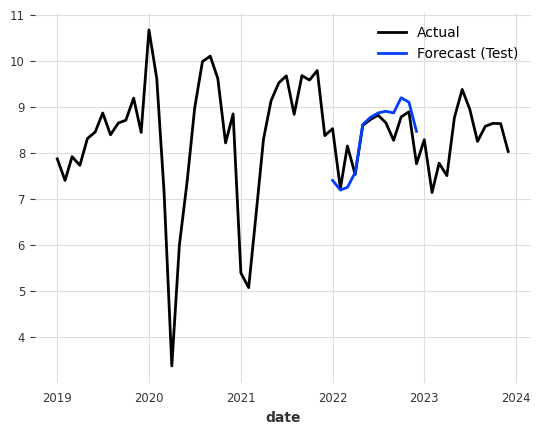

In [50]:
import pandas as pd
from darts import TimeSeries
from datetime import datetime
from darts.models import TransformerModel
from darts.dataprocessing.transformers import Scaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ThammakornS/DataForFun/refs/heads/main/casualties_per_month_long_year_norm_add1.csv')

# Combine year and month into a single datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Create a TimeSeries object (univariate)
series = TimeSeries.from_dataframe(df, 'date', 'value')

# Total length
n_total = len(series)
n_test = 12
n_val = 12

train = series[:n_total - n_test - n_val]
val = series[n_total - n_test - n_val: n_total - n_test]
test = series[-n_test:]

# Normalize based on training set
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)
# train_scaled = train
# val_scaled = val
# test_scaled = test


# Initialize the Transformer model
model = TransformerModel(
    input_chunk_length=18,
    output_chunk_length=4,
    nhead = 1,
    num_encoder_layers = 4,
    num_decoder_layers = 6,
    d_model = 64,
    dim_feedforward = 64,
    dropout = 0.01,
    n_epochs=200,
    random_state=42, # 👈 set seed here
    batch_size=12,
    model_name="car_accident_transformer_16",
    save_checkpoints=True,
    pl_trainer_kwargs={"accelerator": "cpu"},
)
# model = TransformerModel(
#     input_chunk_length=36,
#     output_chunk_length=12,
#     n_epochs=35,
#     random_state=42,
#     dropout=0.01,
#     batch_size=12,
#     model_name="car_accident_transformer_3",
#     save_checkpoints=True,
#     pl_trainer_kwargs={"accelerator": "cpu"},
# )


# Fit on training set
model.fit(train_scaled, verbose=True)

# Predict the test set
forecast_scaled = model.predict(n=n_test)

# Inverse transform forecast and actual
forecast = scaler.inverse_transform(forecast_scaled)
test_actual = scaler.inverse_transform(test_scaled)
# forecast = forecast_scaled
# test_actual = test_scaled

# Plot results
series[-60:].plot(label="Actual")
forecast.plot(label="Forecast (Test)")




In [51]:
y_true = test_actual.values().flatten()
y_pred = forecast.values().flatten()

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score
mape= mean_absolute_percentage_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAPE: 0.04724189032681531
MSE: 0.22367536816785108
RMSE: 0.4729433033333394
R²: 0.39358078543412134


8,4  
MAPE: 0.05956847304064378  
MSE: 0.3390344462352001  
RMSE: 0.5822666453053963  
R²: 0.08082412345715695  

12,4  
MAPE: 0.054753957987916796  
MSE: 0.25020441683434513  
RMSE: 0.5002043750651779  
R²: 0.3216563487503167  

18,4 d_model = 16    
MAPE: 0.036803742134719736  
MSE: 0.12023644831166909  
RMSE: 0.346751277303587  
R²: 0.6740200177400082  

24,4  
MAPE: 0.06138599270910611  
MSE: 0.37132791141655397  
RMSE: 0.6093668118765199  
R²: -0.006728555907123068  

18,4 d_model = 8    
MAPE: 0.06398132356930468  
MSE: 0.45950729616940533  
RMSE: 0.6778696749150277  
R²: -0.2457967809009396  

18,4 d_model = 64 num_encoder_layers = 4 num_decoder_layers = 4  
MAPE: 0.0467800999163078  
MSE: 0.23562299841387016  
RMSE: 0.4854101342307041  
R²: 0.36118887474202666  

18,4 dim_feedforward = 96  
MAPE: 0.05495544210379901  
MSE: 0.2967572874529798  
RMSE: 0.5447543367913465  
R²: 0.19544417139892167 แต่กราฟดูดีนะ

18,4 d_model = 96  
MAPE: 0.06044816954046763  
MSE: 0.34954322844133373  
RMSE: 0.5912218098491747  
R²: 0.05233315682239903  

18,4 d_model = 64 Epoch = 50    
MAPE: 0.048157399824673736  
MSE: 0.28446159747698524  
RMSE: 0.5333494140589125  
R²: 0.22877972693578685 แต่กราฟสวย   

18,4 d_model = 64 Epoch = 50 num_encoder_layers = 6 num_decoder_layers = 4   
MAPE: 0.04875072173710782  
MSE: 0.2570477107504237  
RMSE: 0.5069987285491194  
R²: 0.3031030992100382  

18,4 d_model = 64 Epoch = 50 num_encoder_layers = 2 num_decoder_layers = 4  
MAPE: 0.06481353629168989  
MSE: 0.39184541040687887  
RMSE: 0.6259755669408182  
R²: -0.062354732917513145  

18,4 d_model = 64 Epoch = 50 num_encoder_layers = 4 num_decoder_layers = 6  
MAPE: 0.04311242369738349  
MSE: 0.2201454041116588  
RMSE: 0.46919655168346963  
R²: 0.4031510749476074   

18,4 d_model = 64 Epoch = 50 num_encoder_layers = 6 num_decoder_layers = 6   
MAPE: 0.05590758285661756  
MSE: 0.3741388155659695  
RMSE: 0.6116688773887139  
R²: -0.014349360560183433  

18,4 d_model = 64 Epoch = 50 num_encoder_layers = 6 num_decoder_layers = 8  
MAPE: 0.062271766633616325  
MSE: 0.5428984181014078  
RMSE: 0.7368164073237022  
R²: -0.4718832698961135  